In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import seaborn as sns
import numpy as np


import warnings
warnings.filterwarnings('ignore')


http://localhost:8888/edit/Andys_YouTube_Notebooks-main/Data/15-9-19_SR_COMP.LAS





In [9]:
las1 = lasio.read('15-9-19_SR_COMP.LAS')

In [11]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [16]:
las.sections['Parameter']

[HeaderItem(mnemonic="LNAM", unit="", value="COMPOSITE", descr="NAME"),
 HeaderItem(mnemonic="LTYP", unit="", value="PAP.CMP", descr="LOG TYPE"),
 HeaderItem(mnemonic="LSRV", unit="", value="WL.LOG", descr="LOG SERVICE"),
 HeaderItem(mnemonic="LSOU", unit="", value="STATOIL", descr="LOG SOURCE"),
 HeaderItem(mnemonic="LVSN", unit="", value="1", descr="LOG VERSION"),
 HeaderItem(mnemonic="BHIS", unit="", value="R", descr="BRIEF HISTORY"),
 HeaderItem(mnemonic="R1", unit="", value="LIS DECODE EDITED AND SPLICED DATA.""),
 HeaderItem(mnemonic="R2", unit="", value="LIS DECODE INCLUDING HYBRID CURVES.""),
 HeaderItem(mnemonic="ELZ", unit="", value="0.0", descr="ELEVATION LOG ZERO"),
 HeaderItem(mnemonic="FHIS", unit="", value="RAW-LIS", descr="FULL HISTORY"),
 HeaderItem(mnemonic="QCRM", unit="", value="Waiting for Statoil confirmation","),
 HeaderItem(mnemonic="QCCD", unit="", value="unknown", descr="QC LEVEL"),
 HeaderItem(mnemonic="QCCO", unit="", value="UNKNOWN", descr="QC COMPANY"),
 H

In [17]:
well = las1.df()

In [19]:
well.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


In [21]:
well.describe().T

,count,mean,std,min,25%,50%,75%,max
AC,6579.0,78.313607,17.009535,1.0251,66.169300,74.1459,89.024250,149.2187
CALI,6579.0,9.550656,0.906267,6.0000,9.142900,9.5238,9.904800,20.2857
DEN,6656.0,2.459291,0.162682,2.0377,2.341250,2.5142,2.589800,3.0013
GR,6689.0,36.048563,26.705519,2.7661,14.852300,32.1426,50.901700,304.3337
NEU,6668.0,17.986061,11.694084,2.1783,10.244475,15.2451,22.952525,146.3474
RDEP,6701.0,3.221012,8.860387,0.2503,0.800600,1.7700,3.394000,198.5371
RMED,6701.0,3.081261,6.306741,0.2947,0.844800,1.8014,3.537300,115.6350


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NEU'>

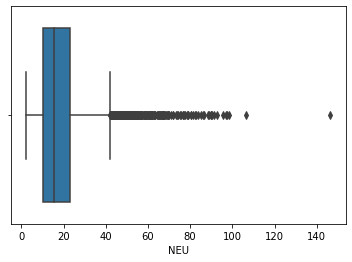

In [28]:
sns.kplot(well['NEU'])

In [89]:
well1 = well[well['NEU']>40]

In [90]:
well1

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
3615.5864,NaN,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
3615.7388,NaN,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
3616.0436,NaN,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940
...,...,...,...,...,...,...,...
4309.3112,NaN,9.6190,2.3722,304.3337,58.5440,2.8261,4.0504
4309.4636,106.2163,9.6190,2.6737,295.9745,42.5531,2.8519,3.9470
4309.6160,NaN,9.6190,2.7032,293.4359,54.5575,2.9499,3.5549


In [114]:
well1['CALI'] = well1['CALI'].fillna(well1['CALI'].median())

In [115]:
well1['DEN'] = well1['DEN'].fillna(well1['DEN'].median())

In [116]:
well1['AC'] = well1['AC'].fillna(well1['AC'].median())

In [117]:
well2 = well[well['NEU']<=40]

In [118]:
well2

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3616.1960,101.3599,11.1429,2.2043,34.5944,33.7486,0.7461,0.7998
3616.3484,101.7746,10.2602,2.2558,30.2169,25.1014,0.7584,0.8431
3616.5008,93.5910,10.0952,2.3477,32.7352,15.9389,0.9299,1.0334
3616.6532,86.7889,10.4122,2.4238,30.3098,14.3046,1.1877,1.3554
3616.8056,113.5721,10.1185,2.4514,32.6037,12.7656,1.2524,1.7562
...,...,...,...,...,...,...,...
4630.8752,73.5334,NaN,NaN,46.9518,19.5587,0.7637,0.6602
4631.0276,73.5334,NaN,NaN,44.8223,19.3362,0.7515,0.6018
4631.1800,73.5334,NaN,NaN,44.3906,19.0894,0.7944,0.6457


In [119]:
well2['CALI'] = well2['CALI'].fillna(well2['CALI'].median())

In [120]:
well2['DEN'] = well2['DEN'].fillna(well2['DEN'].median())

In [121]:
well2['AC'] = well2['AC'].fillna(well2['AC'].median())

In [122]:
well2

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3616.1960,101.3599,11.1429,2.2043,34.5944,33.7486,0.7461,0.7998
3616.3484,101.7746,10.2602,2.2558,30.2169,25.1014,0.7584,0.8431
3616.5008,93.5910,10.0952,2.3477,32.7352,15.9389,0.9299,1.0334
3616.6532,86.7889,10.4122,2.4238,30.3098,14.3046,1.1877,1.3554
3616.8056,113.5721,10.1185,2.4514,32.6037,12.7656,1.2524,1.7562
...,...,...,...,...,...,...,...
4630.8752,73.5334,9.5238,2.5202,46.9518,19.5587,0.7637,0.6602
4631.0276,73.5334,9.5238,2.5202,44.8223,19.3362,0.7515,0.6018
4631.1800,73.5334,9.5238,2.5202,44.3906,19.0894,0.7944,0.6457


In [123]:
X_train = well2.drop('NEU',axis=1)
y_train = well2['NEU']

In [124]:
X_test = well1.drop('NEU',axis=1)

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
model = RandomForestRegressor()

In [127]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [128]:
yp_test = model.predict(X_test)

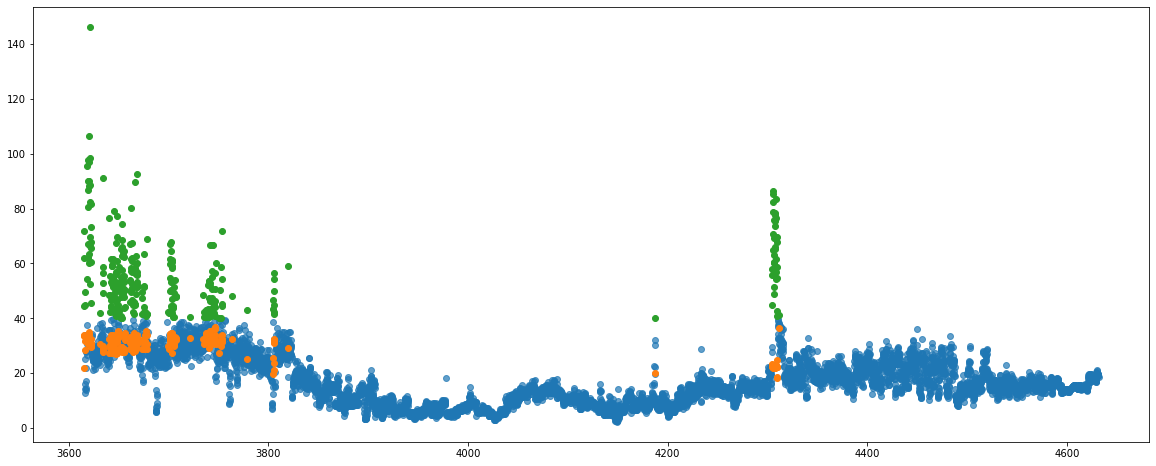

In [131]:
plt.figure(figsize = (20,8))

plt.scatter(well2.index,well2['NEU'],alpha = 0.7)

plt.scatter(well1.index,yp_test)

plt.scatter(well1.index,well1['NEU'])